
This note book cover the following concepts

1. Visualization
2. Sea born

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [143]:
full_data = pd.read_csv('/content/titanic_cleaned.csv')

**Data Shape**  
After loading the dataset, I examine its shape to get a better sense of the data and the information it contains.  

In [144]:
# Data shape
print('train data:',full_data.shape)

train data: (889, 9)


In [145]:
# View first few rows
full_data.head(5)

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

In [ ]:
# Data Info
full_data.info()


>Now the train data is perfect for a machine learning algorithm:  
- all the data is numeric
- everything is concatenated together

## **OBJECTIVE 2: MACHINE LEARNING**
Next, I will feed these features into various classification algorithms to determine the best performance using a simple framework: **Split, Fit, Predict, Score It.**

## **Target Variable Splitting**
We will spilt the Full dataset into **Input** and **target** variables

Input is also called **Feature Variables**
Output referes to Target **variables**

In [146]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = full_data['Survived'] # y is the column we're trying to predict


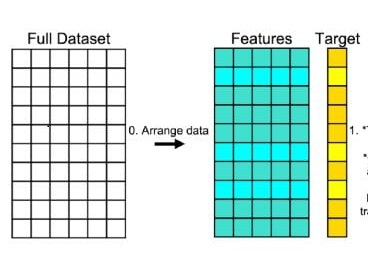

In [147]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

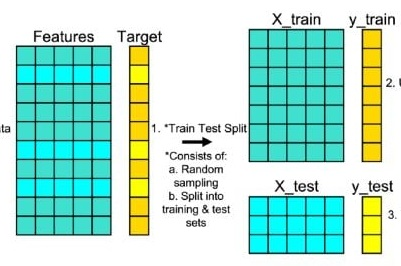

In [148]:
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("---"*10)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (711, 8)
Shape of y_train:  (711,)
------------------------------
Shape of x_test:  (178, 8)
Shape of y_test:  (178,)


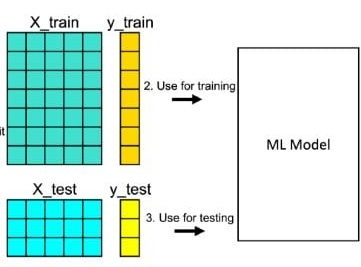

# **1. LOGISTIC REGRESSION**

## **Model Training**

In [149]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

## **Model Evaluation**
**Logistic regression**

In [150]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 82.02 %


In [151]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_log_reg)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")

Precision: 0.85
Recall: 0.66
------------------------------------------------------------
[[99  8]
 [24 47]]


<Axes: >

# **2. Decision Tree**

## **Model Training**

In [152]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)


Decision Tree Classifier


DecisionTreeClassifier()

## **Model Evalution**
**Decision Tree Classifier**

In [153]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 79.21 %


In [154]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_Dtree)
recall = recall_score(y_test, y_pred_Dtree)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_Dtree)

sns.heatmap(confusion, annot=True, fmt="d")

Precision: 0.72
Recall: 0.77
------------------------------------------------------------


<Axes: >

# **3. Random Forest**

## **Model Training**

In [155]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)


Random Forest Classifier


RandomForestClassifier()

## **Model Evaluation**
**Random Forest**

In [156]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 82.02 %


Precision: 0.79
Recall: 0.75
------------------------------------------------------------


<Axes: >

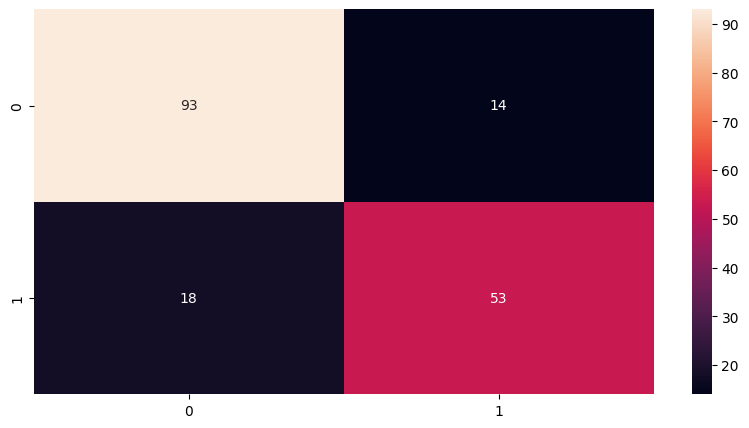

In [157]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(confusion, annot=True, fmt="d")

# **4. Gradient Bossting Classifier**

## **Model Training**

In [158]:
from sklearn.ensemble import GradientBoostingClassifier

print('Gradient Boosting Classifier')
# Create instance of model
gbc = GradientBoostingClassifier()

# Pass training data into model
gbc.fit(x_train, y_train)


Gradient Boosting Classifier


GradientBoostingClassifier()

## **Model Evalution**
**Gradient Boosting**

In [159]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_gbc = gbc.predict(x_test)
# Score It

print('Gradient Boosting Classifier')
# Accuracy
print('--'*30)
gbc_accuracy = round(accuracy_score(y_test, y_pred_gbc) * 100,2)
print('Accuracy', gbc_accuracy,'%')

Gradient Boosting Classifier
------------------------------------------------------------
Accuracy 84.27 %


In [160]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_gbc)
recall = recall_score(y_test, y_pred_gbc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(confusion, annot=True, fmt="d")

Precision: 0.83
Recall: 0.76
------------------------------------------------------------


<Axes: >

In [ ]:
sns.countplot(x="Survived", data=full_data, palette="Blues");
plt.show()

In [ ]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": 82.02,
    "Decision Tree Classifier": 80.34,
    "Random Forest Classifier": 82.58,
    "Gradient Boosting Classifier": 84.27
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")
